## Table of Contents
- Process of Machine Learning Predictions
- Housing Data Set
- Understand the problem
- Hypothesis Generation
- Get Data
- Data Exploration
- Data Pre-Processing
- Feature Engineering - Create 331 new features
- Model Training - XGBoost, Neural Network, Lasso
- Model Evaluation

In [ ]:
#loading data
#train = pd.read_csv("/data/Housing/train.csv")
#test = pd.read_csv("/data/Housing/test.csv")

train=read.csv("Data_USAHouse/train.csv")
test=read.csv("Data_USAHouse/test.csv")

In [ ]:
# train.head()
head(train)

In [ ]:
head(test)

In [ ]:
dim(train)

In [ ]:
# print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
cat("Train Dataset :\n" , "Nbr of rows ",nrow(train),  "\n", "Nbr of Colimns:", ncol(train), "\n")
cat("test Dataset :\n" , "Nbr of rows ",nrow(test),  "\n", "Nbr of Colimns:", ncol(test))



In [ ]:
ncol(train)

In [ ]:
# train.info()
str(train)

In [ ]:
sapply(train, function(x) any(is.na(x)))

In [ ]:
colnames(train)[!complete.cases(t(train))]

In [ ]:
library(tidyverse)

In [ ]:
library(ggplot2)

In [ ]:
sum(is.na(train))/length(train)

In [ ]:
train %>% summarise_all(funs(sum(is.na(.))))

In [56]:
# miss = train.isnull().sum()/len(train)
# miss = miss[miss > 0]
# miss.sort_values(inplace=True)
# miss
df<-train %>%
summarise_all(~ sum(is.na(.))/nrow(train)) 
df

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0.1773973,0,0,0.9376712,0,0,0,⋯,0,0.9952055,0.8075342,0.9630137,0,0,0,0,0,0


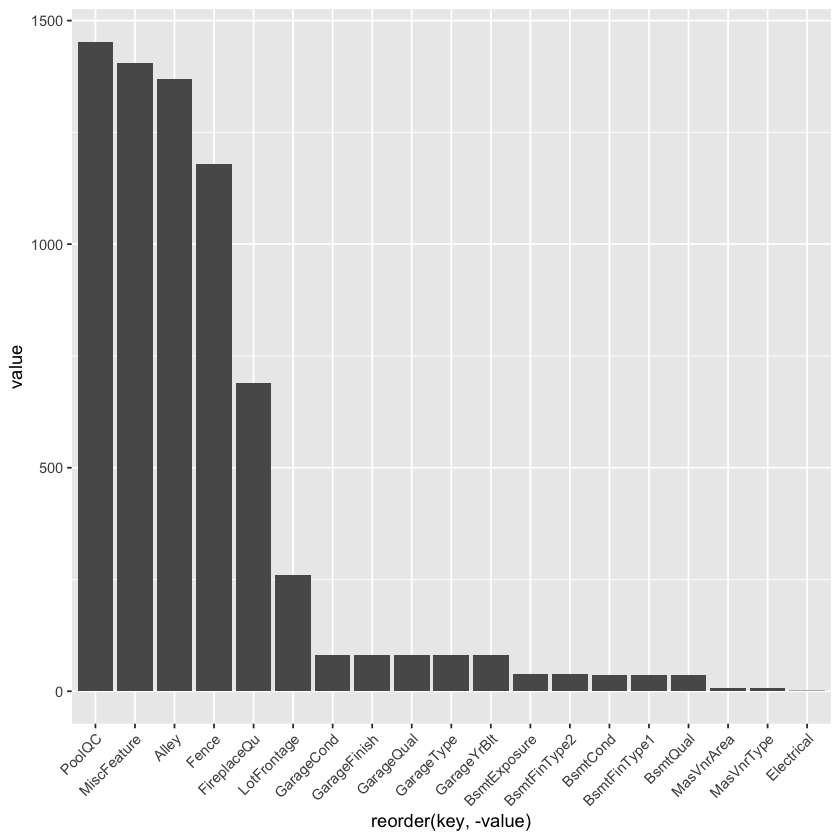

In [50]:
df %>%
  gather(key, value) %>%
  filter(value != 0) %>%

  ggplot(aes(x = reorder(key, -value), y = value)) +
  geom_col()+
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
barplot(unlist(df[1, df[1, ] != 0]))

In [ ]:
train %>%
  summarise_all(~sum(as.integer(is.na(.))))

In [ ]:
barplot(train$SalePrice)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



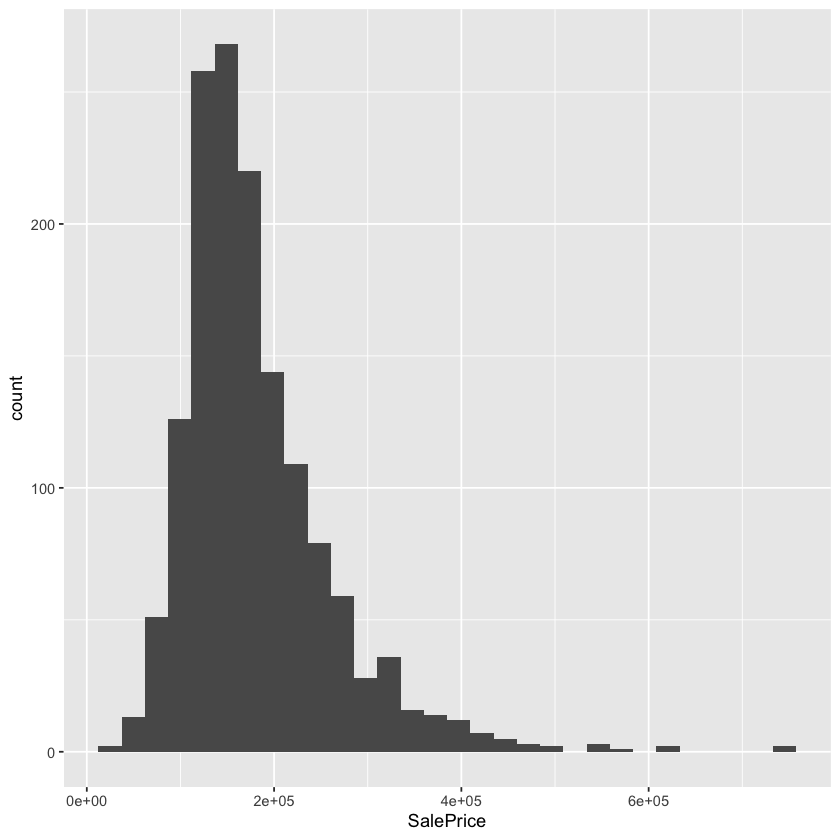

In [44]:
train %>% ggplot(., aes(SalePrice)) +
       geom_histogram()

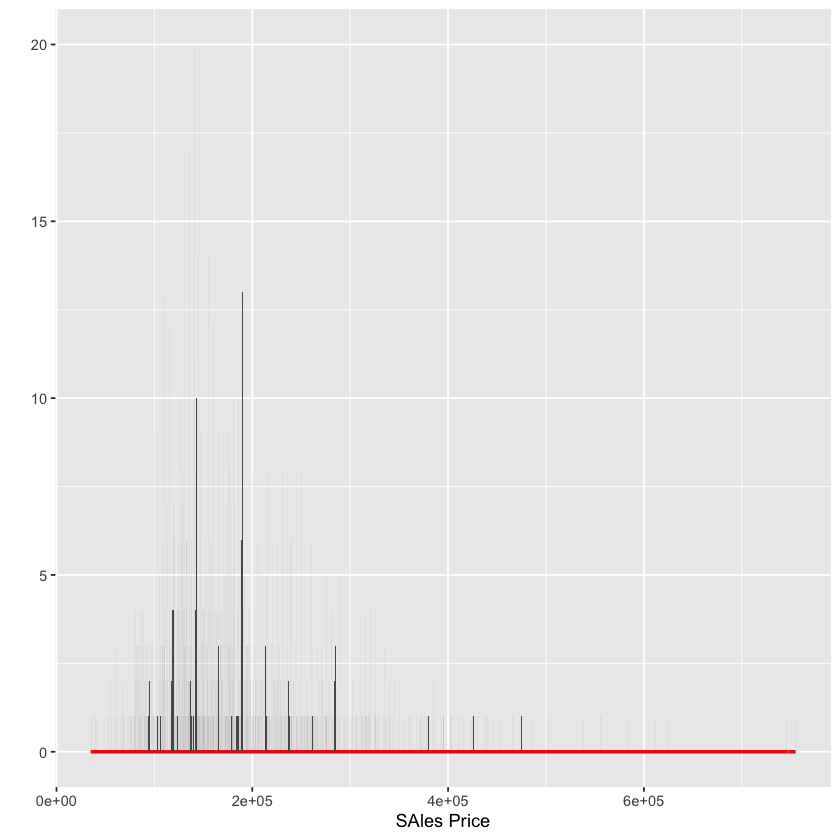

In [74]:
ggplot(train, aes(train$SalePrice)) +
#geom_histogram(aes(y=..density..), fill="pink", binwidth = .1)+
stat_function(fun = dnorm, 
        args = list(mean = mean(train$SalePrice), 
                    sd = sd(train$SalePrice)), 
        colour = 'red', size = 1) +
geom_histogram(binwidth = 50)+
 labs(x = 'SAles Price', y = '') 

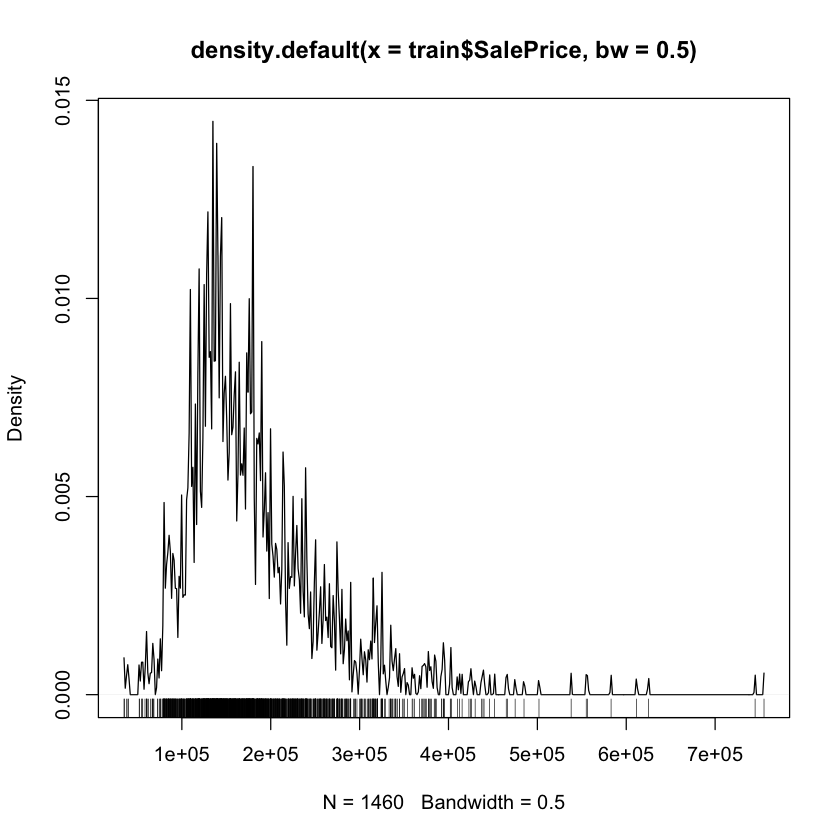

In [61]:
plot(density(train$SalePrice, bw=0.5))
rug(jitter(train$SalePrice))

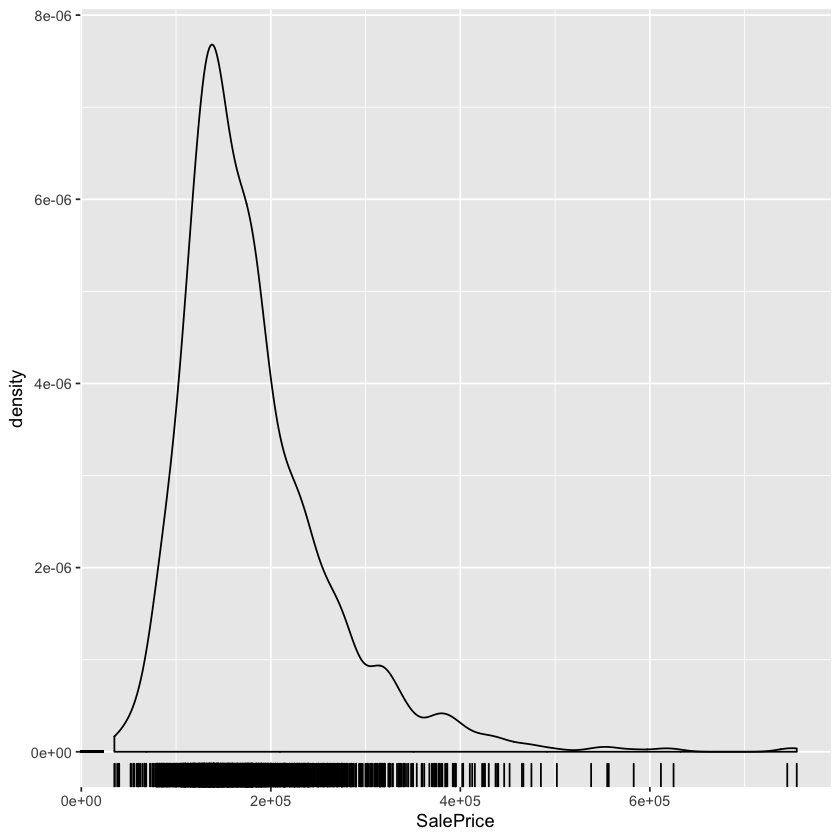

In [69]:
ggplot(train) +
    geom_density(aes(SalePrice)) +
    #geom_histogram(aes(y=..density..), fill="pink", binwidth =10) +
    geom_rug(aes(SalePrice, 0), position = position_jitter(height = 0))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



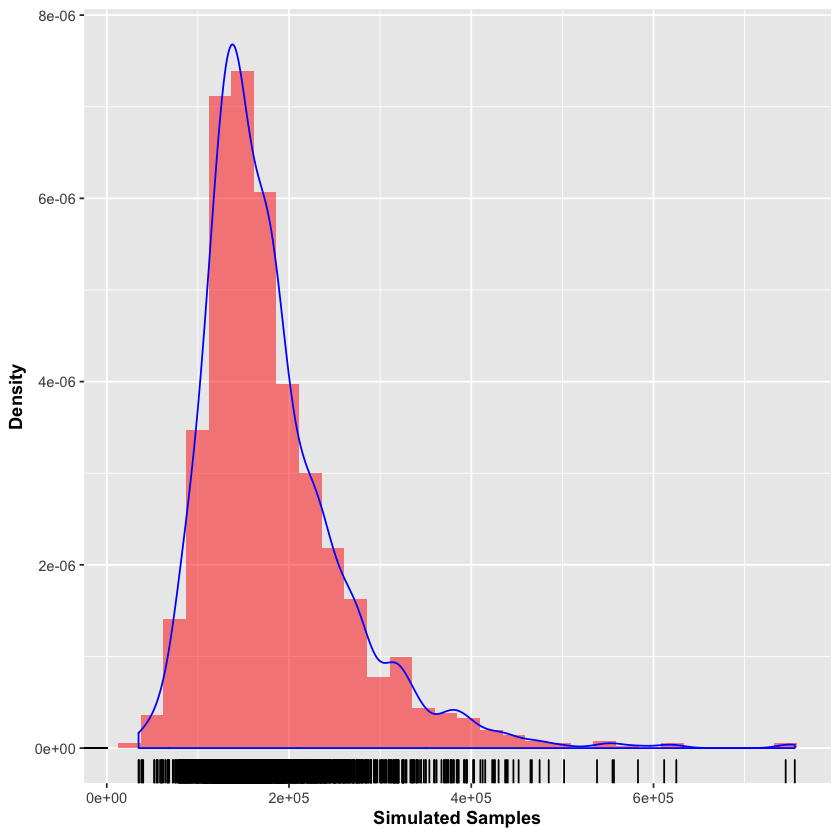

In [85]:
#sns.distplot(train['SalePrice'])
ggplot(train, aes(x = SalePrice)) + 
       geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5) + 
       geom_density(colour = 'blue') + xlab(expression(bold('Simulated Samples'))) + 
    geom_rug(aes(SalePrice, 0), position = position_jitter(height = 0))+
       ylab(expression(bold('Density')))


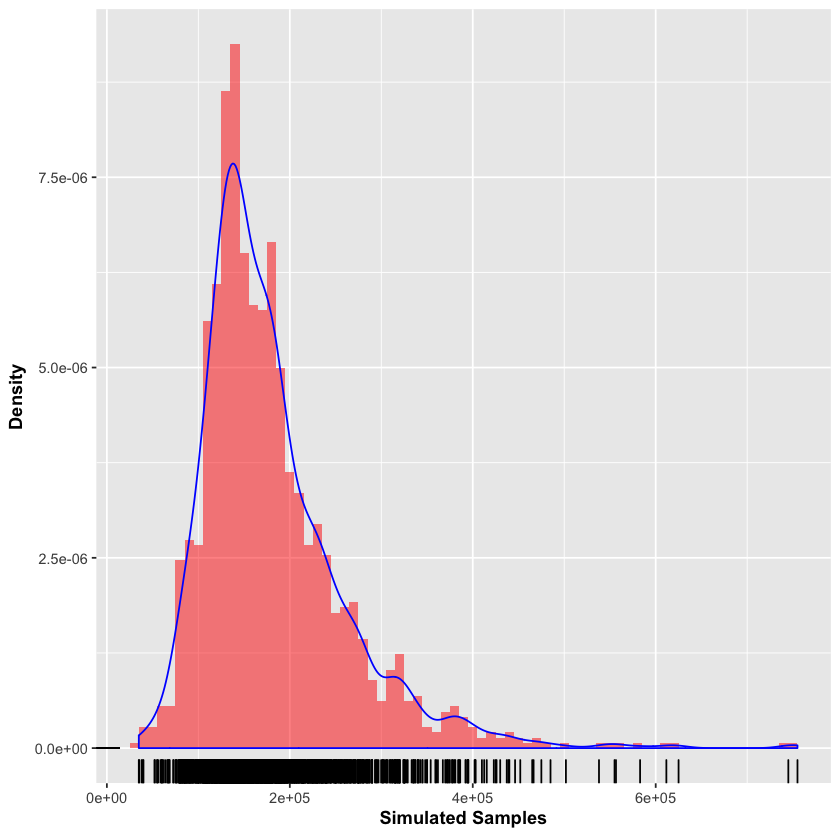

In [91]:
ggplot(train, aes(x = SalePrice)) + 
       geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5,  binwidth = 10^4) + 
       geom_density(colour = 'blue') + xlab(expression(bold('Simulated Samples'))) + 
    geom_rug(aes(SalePrice, 0), position = position_jitter(height = 0))+
       ylab(expression(bold('Density')))

In [76]:
install.packages("moments")
library(moments)


The downloaded binary packages are in
	/var/folders/hw/83xf1jxs0b58xft1b6ghk0280000gn/T//RtmpB0VjNW/downloaded_packages


## Skewnes
$$\Large skew=  \left.  {\frac{\sum(x_i-\bar x)^3}{n}} \middle/ {(\frac{\sum(x_i-\bar x)^2}{n})^{3/2}} \right. $$

In [94]:
#print "The skewness of SalePrice is {}".format(train['SalePrice'].skew())
cat( "skewness is  : " , skewness(train$SalePrice))

skewness is :  1.880941

In [107]:
# Let's log transform this variable and see if this variable distribution can get any closer to normal.
# now transforming the target variable
# target = np.log(train['SalePrice'])
# print ('Skewness is', target.skew())
# sns.distplot(target)
cat( "skewness is  : " , skewness(log(train$SalePrice)))

skewness is  :  0.1212104

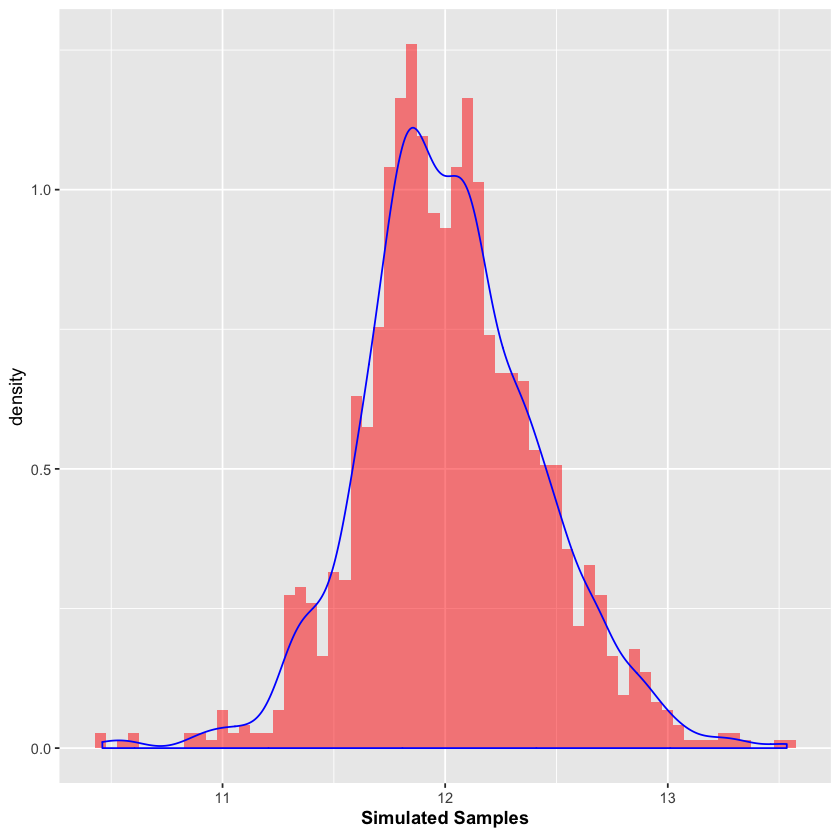

In [116]:
# we changed here the binwidth value to cope with log values
ggplot(train, aes(x=log(SalePrice))) + 
       geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5,  binwidth = .05) + 
       geom_density(colour = 'blue') + xlab(expression(bold('Simulated Samples')))

$$ \text {distribution looks closer to normal}$$

In [140]:
#separate variables into new data frames
# numeric_data = train.select_dtypes(include=[np.number])
# cat_data = train.select_dtypes(exclude=[np.number])
# print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))`


ncol(train[sapply(train, is.numeric)] )


[1] 38

In [174]:
#separate variables into new data frames
#numeric_data = train.select_dtypes(include=[np.number])
numeric_data <- train[,unlist(lapply(train, is.numeric))]
#cat_data = train.select_dtypes(exclude=[np.number])
cat_data<- train[,unlist(lapply(train, is.factor))]
cat("There are ", ncol(numeric_data), " numeric and ",ncol(cat_data) ," categorical columns in train ")

There are  38  numeric and  43  categorical columns in train 

In [175]:
# remove the Id variable from numeric data.
#del numeric_data['Id']
numeric_data$Id<- NULL
ncol(numeric_data)

In [192]:
#correlation plot
#corr = numeric_data.corr()
#sns.heatmap(corr)
corData<-round(cor(numeric_data),2)

[ColorMap](https://www.r-graph-gallery.com/215-the-heatmap-function.html)

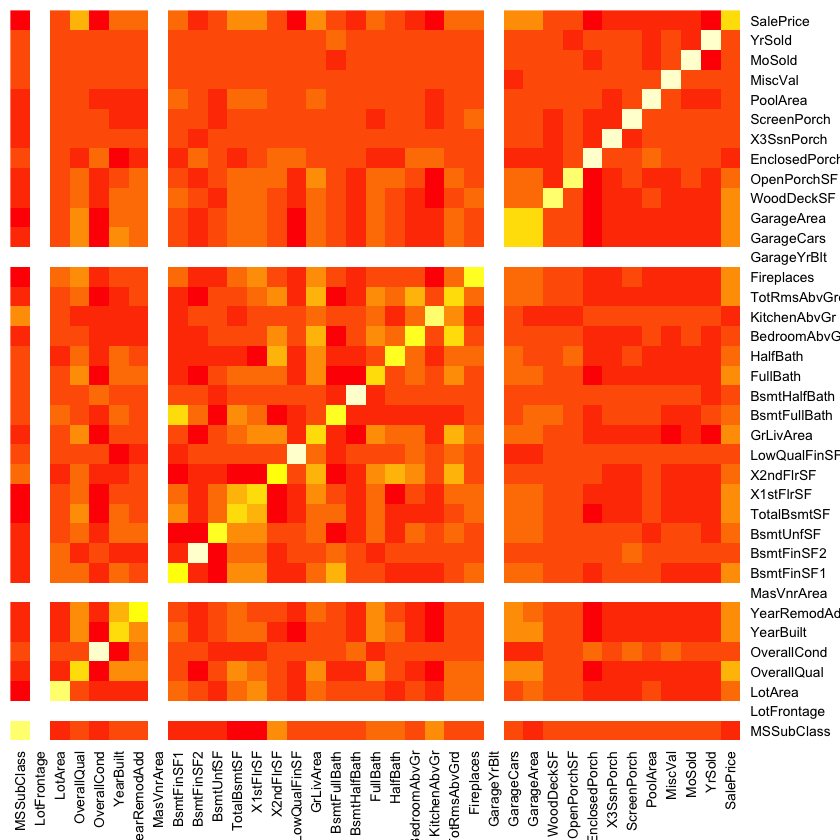

In [199]:
data<-as.matrix(corData)
heatmap(data,Colv = NA, Rowv = NA)

In [213]:
# print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
# print ('----------------------')
# print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`
round(cor(numeric_data),2) %>% head

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,NA,-0.14,0.03,-0.06,0.03,0.04,NA,-0.07,-0.07,⋯,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
LotArea,-0.14,NA,1.00,0.11,-0.01,0.01,0.01,NA,0.21,0.11,⋯,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,NA,0.11,1.00,-0.09,0.57,0.55,NA,0.24,-0.06,⋯,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,NA,-0.01,-0.09,1.00,-0.38,0.07,NA,-0.05,0.04,⋯,0.00,-0.03,0.07,0.03,0.05,0.00,0.07,0.00,0.04,-0.08
YearBuilt,0.03,NA,0.01,0.57,-0.38,1.00,0.59,NA,0.25,-0.05,⋯,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
